# [Lab Session 3](fourier.ipynb)


In [24]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize
from skimage import io, color

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


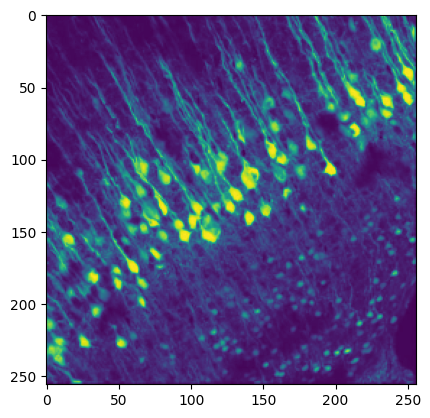

In [25]:
cell_img = plt.imread('data/cells.png')
cell_resized = resize(cell_img,(256,256));
plt.imshow(cell_resized);
#cell_img_gray = color.rgb2gray(cell_resized)
#plt.imshow(cell_img_gray)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [26]:
cell_ft = np.fft.fft2(cell_resized) #fast Fourier transform
cell_ft.dtype #check type -> complex array

dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


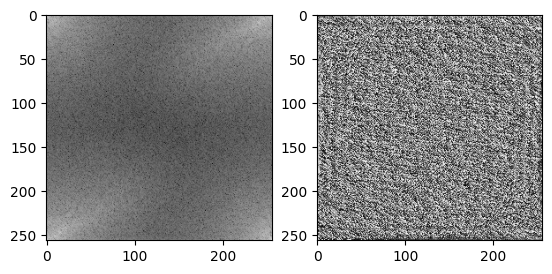

In [27]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray');

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


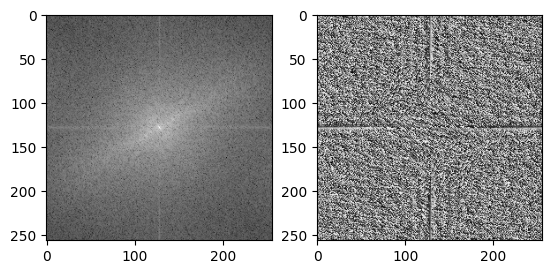

In [28]:
cell_shifted = np.fft.fftshift(cell_ft)
amplitude2 = np.abs(cell_shifted)
phase2 = np.angle(cell_shifted)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude2), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase2, 'gray');

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


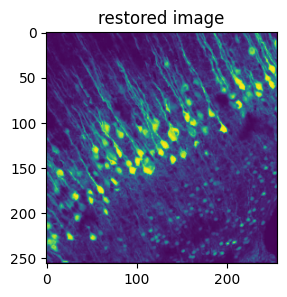

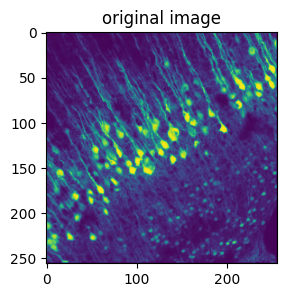

In [29]:
restored_image = np.fft.ifft2(cell_ft).real
plt.figure(figsize=(5,3))
plt.title('restored image')
plt.imshow(restored_image);
plt.figure(figsize=(5,3))
plt.title('original image')
plt.imshow(cell_resized);

---


**[Task 2 (a).]()** Load the brain CT image.


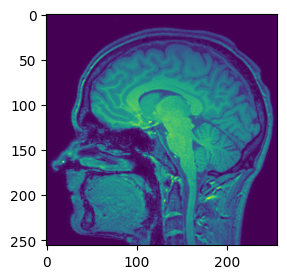

In [30]:
imgbrain = plt.imread('data/brain_ct.png')
plt.figure(figsize=(5,3))
plt.imshow(imgbrain);

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


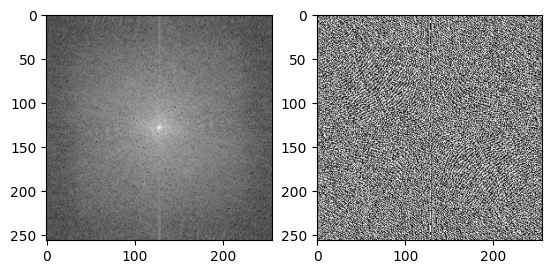

In [31]:
brain_ft = np.fft.fft2(imgbrain)
brain_shifted = np.fft.fftshift(brain_ft)
amplitude3 = np.abs(brain_shifted)
phase3 = np.angle(brain_shifted)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude3), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase3, 'gray');

In [32]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


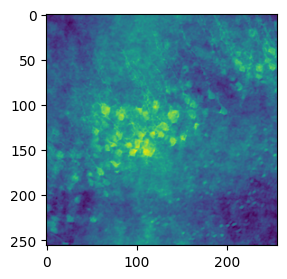

In [33]:
merged_amplitude = np.fft.ifftshift(amplitude3)
merged_phase = np.fft.ifftshift(phase2) #seems to contain most of the information
complex_array = to_complex_array(merged_amplitude, merged_phase)
image_brain_cell = np.fft.ifft2(complex_array).real
plt.figure(figsize=(5,3))
plt.imshow(image_brain_cell);


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


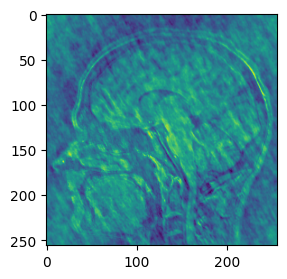

In [34]:
merged_amplitude2 = np.fft.ifftshift(amplitude2)
merged_phase2 = np.fft.ifftshift(phase3) #seems to contain most of the information
complex_array2 = to_complex_array(merged_amplitude2, merged_phase2)
image_cell_brain = np.fft.ifft2(complex_array2).real
plt.figure(figsize=(5,3))
plt.imshow(image_cell_brain);

**Result:**

The **phase** seems to contain much more information than the **amplitude**.

---


**[Task 3 (a).]()** Create a lowpass filter mask.


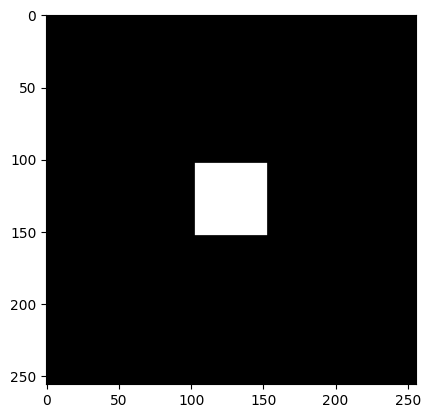

<Figure size 500x300 with 0 Axes>

In [35]:

filter_window_size = 50
input_size = 256
mask = np.zeros((input_size, input_size))
center_y, center_x = mask.shape[0]//2, mask.shape[1]//2
mask[center_y - filter_window_size // 2: center_y + filter_window_size //2,
    center_x  - filter_window_size // 2: center_x + filter_window_size // 2] = 1
plt.imshow(mask, cmap='gray')
plt.figure(figsize=(5,3))
plt.show()


In [36]:
""" leider falsch
#lowpassfilter = mean filter
def lowpassfilter(i): #Größe 50x50
    #array erstellen nach Filterung
    #(Pixel der 50x50 Umgebung)
    neighborhood_sum = 0
    n = (filter_window_size - 1) // 2           
                                #berechnet den Mittelpunkt des Filterkernels
    img = plt.imread(f'data/NIH3T3/im/dna-{i}.png')      #das Bild wird eingelesen        
    result = np.zeros(img.shape) #als Ergebnis wird ein array voller Nullen in der Größe des Bildes definiert
                                #und als neuer Pixelwert für den zentralen Pixel festgelegt
    for p in np.ndindex(img.shape):  #Iteration über alle Pixelwerte des Bildes
        if (p[0] >= n and p[0] < img.shape[0]-n and
            p[1] >= n and p[1] < img.shape[1]-n):  #gibt es genügend Platz in den Zeilen/Spalten, 
            neighborhood_sum = 0  #Skalar für die Summe                                      #um den Filter anzuwenden?**
            for q in np.ndindex(filter_window_size, filter_window_size):       #summiert die Werte in der Nachbarschatsumgebung auf
                neighborhood_sum += img[p[0]-n +q[0],p[1]-n +q[1]]
            result[p[0],p[1]] = neighborhood_sum / filter_window_size**2   #setzt den Wert des Pixels im Ergebnisbild auf den MW der Nachbarschaft
        else:
            result[p[0],p[1]] = 0
    return result
#erste Koordinate ist y, die zweite ist x
lowpassfilter(1)"""

" leider falsch\n#lowpassfilter = mean filter\ndef lowpassfilter(i): #Größe 50x50\n    #array erstellen nach Filterung\n    #(Pixel der 50x50 Umgebung)\n    neighborhood_sum = 0\n    n = (filter_window_size - 1) // 2           \n                                #berechnet den Mittelpunkt des Filterkernels\n    img = plt.imread(f'data/NIH3T3/im/dna-{i}.png')      #das Bild wird eingelesen        \n    result = np.zeros(img.shape) #als Ergebnis wird ein array voller Nullen in der Größe des Bildes definiert\n                                #und als neuer Pixelwert für den zentralen Pixel festgelegt\n    for p in np.ndindex(img.shape):  #Iteration über alle Pixelwerte des Bildes\n        if (p[0] >= n and p[0] < img.shape[0]-n and\n            p[1] >= n and p[1] < img.shape[1]-n):  #gibt es genügend Platz in den Zeilen/Spalten, \n            neighborhood_sum = 0  #Skalar für die Summe                                      #um den Filter anzuwenden?**\n            for q in np.ndindex(filter_w

**[Task 3 (b).]()** Create a highpass filter mask.


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


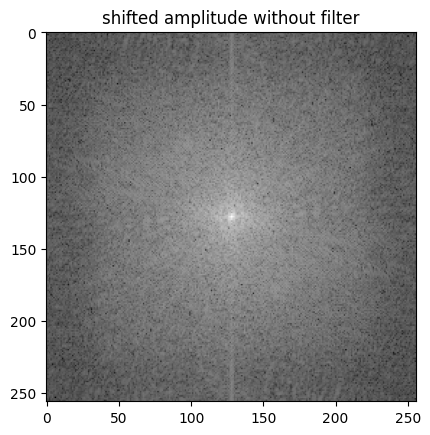

<Figure size 640x480 with 0 Axes>

In [37]:
plt.title('shifted amplitude without filter')
plt.imshow(np.log(amplitude3), cmap = 'gray');
plt.show()
plt.clf()

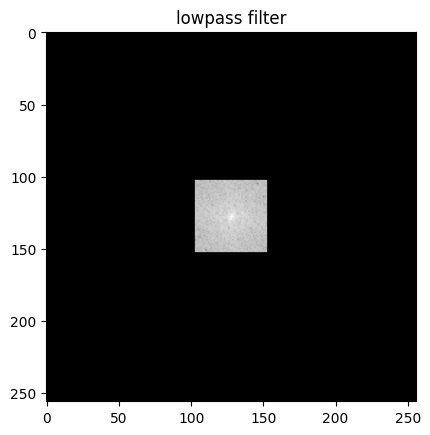

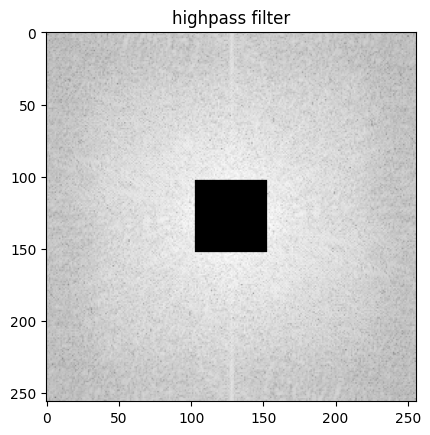

In [38]:

lowpass = mask * amplitude3
plt.title('lowpass filter')
plt.imshow(np.log(lowpass+1e-6), cmap='gray');
plt.show()
plt.clf()

highpass = (1 - mask) * amplitude3
plt.title('highpass filter')
plt.imshow(np.log(highpass+1e-6), cmap='gray');


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


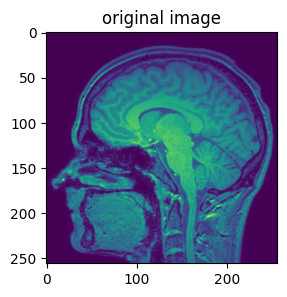

<Figure size 640x480 with 0 Axes>

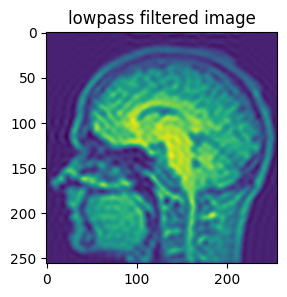

Text(0.5, 1.0, 'highpass filtered image')

<Figure size 640x480 with 0 Axes>

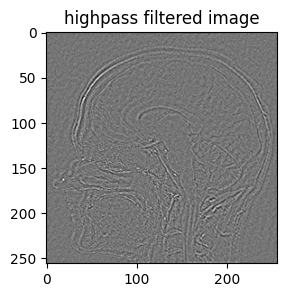

In [39]:
complex_array4 = np.fft.ifftshift(to_complex_array(lowpass, phase3))
restored_image_filter = np.fft.ifft2(complex_array4).real


plt.figure(figsize=(5,3))
plt.imshow(imgbrain);
plt.title('original image')
plt.show()
plt.clf()

plt.figure(figsize=(5,3))
plt.imshow(restored_image_filter);
plt.title('lowpass filtered image')
plt.show()
plt.clf()

highpass = (1 - mask) * imgbrain
complex_array5 = np.fft.ifftshift(to_complex_array(highpass, phase3))
highpass_image_filter = np.fft.ifft2(complex_array5).real
plt.figure(figsize=(5,3))
plt.imshow((highpass_image_filter), cmap='gray'); #richtig??
plt.title('highpass filtered image')



**[Task 3 (e).]()** Repeat the steps above using different filter sizes and observe the differences.

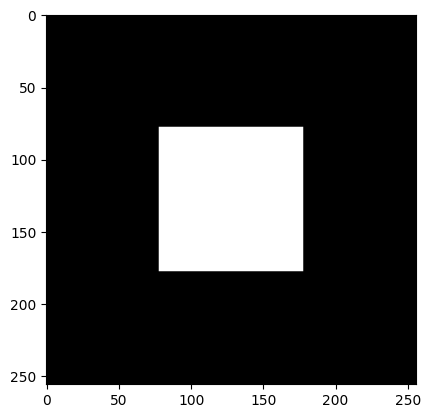

<Figure size 500x300 with 0 Axes>

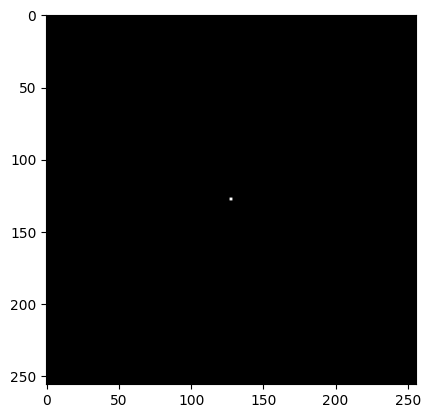

<Figure size 500x300 with 0 Axes>

In [40]:
filter_window_size = 100
input_size = 256
mask2 = np.zeros((input_size, input_size))
center_y, center_x = mask2.shape[0]//2, mask2.shape[1]//2
mask2[center_y - filter_window_size // 2: center_y + filter_window_size //2,
    center_x  - filter_window_size // 2: center_x + filter_window_size // 2] = 1
plt.imshow(mask2, cmap='gray')
plt.figure(figsize=(5,3))
plt.show()
plt.clf()
filter_window_size = 3
input_size = 256
mask3 = np.zeros((input_size, input_size))
center_y, center_x = mask3.shape[0]//2, mask3.shape[1]//2
mask3[center_y - filter_window_size // 2: center_y + filter_window_size //2,
    center_x  - filter_window_size // 2: center_x + filter_window_size // 2] = 1
plt.imshow(mask3, cmap='gray')
plt.figure(figsize=(5,3))
plt.show()

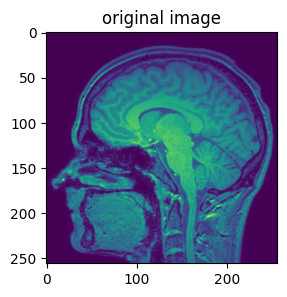

<Figure size 640x480 with 0 Axes>

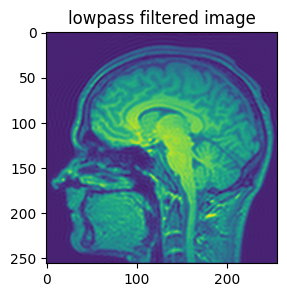

<Figure size 640x480 with 0 Axes>

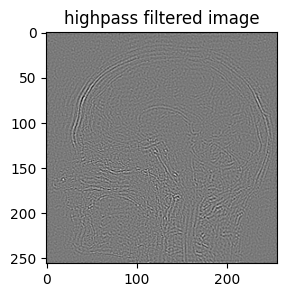

<Figure size 640x480 with 0 Axes>

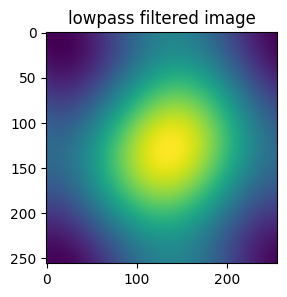

Text(0.5, 1.0, 'highpass filtered image')

<Figure size 640x480 with 0 Axes>

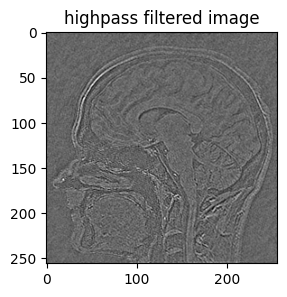

In [41]:
lowpass2 = mask2 * amplitude3
complex_array4 = np.fft.ifftshift(to_complex_array(lowpass2, phase3))
lowpassfilteredimage = np.fft.ifft2(complex_array4).real


plt.figure(figsize=(5,3))
plt.imshow(imgbrain);
plt.title('original image')
plt.show()
plt.clf()

plt.figure(figsize=(5,3))
plt.imshow(lowpassfilteredimage);
plt.title('lowpass filtered image')
plt.show()
plt.clf()

highpass2 = (1 - mask2) * imgbrain
complex_array5 = np.fft.ifftshift(to_complex_array(highpass2, phase3))
highpass_image_filter2 = np.fft.ifft2(complex_array5).real
plt.figure(figsize=(5,3))
plt.imshow((highpass_image_filter2), cmap='gray'); #richtig??
plt.title('highpass filtered image')
plt.show()
plt.clf()

lowpass3 = mask3 * amplitude3
complex_array6 = np.fft.ifftshift(to_complex_array(lowpass3, phase3))
lowpassfilteredimage2 = np.fft.ifft2(complex_array6).real

plt.figure(figsize=(5,3))
plt.imshow(lowpassfilteredimage2);
plt.title('lowpass filtered image')
plt.show()
plt.clf()

highpass3 = (1 - mask3) * imgbrain
complex_array7 = np.fft.ifftshift(to_complex_array(highpass3, phase3))
highpass_image_filter3 = np.fft.ifft2(complex_array7).real
plt.figure(figsize=(5,3))
plt.imshow((highpass_image_filter3), cmap='gray'); #richtig??
plt.title('highpass filtered image')

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [44]:
def dft_function(img):
    dft = np.zeros(img.shape, dtype=complex)
    M,N = img.shape
    
    for u in range(M):
        for v in range(N):
            summe = 0
            for x in range(0,M):
                for y in range(0,N):
                    pass
            #         input1 = ((u*x)/M)+((v*y)/N)
            #         second_part_equation = np.exp(-2j*np.pi*input1)
            #         summe += img[x,y] * second_part_equation
            #         sum1 = x * second_part_equation
                    #sum1.append()
                    #sum2 = y * second_part_equation
                    #sum2.append()
   
            #dft[u,v] = summe / (M*N)
    return dft


    
dft_function(imgbrain)



---


KeyboardInterrupt: 

**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [ ]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
